# Raw Data Processing - Dwelling Stock in France 

TEP4290, Spring 2024

This code represents the final project of the group 7 of the TEP4290. The students are: Clothilde Barnabe and Léo Liberkowski

## Preparation: Packages and data imports

We start by importing the necessary packages:

In [1]:
# Write all the necessary imports here
import math as m
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from regression_functions import *
from dynamic_stock_model import *
from scipy.optimize import curve_fit
from sklearn.impute import SimpleImputer

For data importations, please complete the code below with your own pathway

In [7]:
personnal_path = "C:\\Users\\Clothilde\\Documents\\GitHub\\"
#personnal_path = "C:\\leo\\double-diplome\\COURSES\\S2\\TEP4290\\project\\"

Then we import the different data into a Dataframe using the pandas read_excel function and we clean it.

## Data import

### Type split

Concerning the typesplit of the buildings in order to find the stock by type we have two datasets:
- one with the inflow of buildings by type and year still standing in 1991 (from before 1915 to 1991)
- another one with the inflow of buildings by type and year still standing in 2022 (inflows from 2012 to 2022)

In our model, we will merge the two database by considering that the inflow of the buildings still standing in 1991 is a good representation of the total inflows in year XXXX.

Let's first create our database which will contain all the pourcentages.

In [8]:
data_percentage = pd.DataFrame(index=range(1600, 2051))


#### Part 1 - Data from 1980 to 2022

In [ ]:
# Extracting data from the source file into a panda Dataframe
file = personnal_path + 'Project-TEP4290\\data\\03.Processed_validation\\buildings\\inflow\\input1980_2022.xlsx'

# We read the data and store it in a Dataframe called "data", using the read_excel() panda function
headers = pd.read_excel(file, sheet_name=0, header=None, skiprows=0, nrows=1, usecols="A:F").iloc[0]
data_typesplit = pd.read_excel(file, sheet_name=0,  header=None, skiprows=1,nrows=43, usecols="A:F")

data_typesplit.columns = headers

# This is just to replace all the void values in "data" by 0, which makes things easier
data_typesplit.fillna(0, inplace=True)


,Year,SFH,TH,MFH,AB,Sum
0,1980,231100,82200,188000,2400,503800
1,1981,198800,76100,200400,5400,480700
2,1982,191900,61800,167600,7300,428600
3,1983,182300,52300,134600,6300,375500
4,1984,175700,51100,121800,5800,354400
5,1985,164000,49300,134500,6100,353900
6,1986,169000,46200,148200,4300,367700
7,1987,167100,50500,178400,6500,402500
8,1988,158700,53200,203000,6500,421400
9,1989,148700,46900,203200,4300,403100


We want to focus on the percentage of each type of dwelling in order to calculate the stock/inflow/outflow of dwelling per type from 1600 to 2050. Therefore, we have to see if we consider a constant coefficient, or if we try to do a regrerssion on the percentage of dwelling. Let's now draw the repartition of each type of buildings from 2011 to 2022.

In [10]:
for col in headers[1:-1]:  # Exclure la première colonne (année) et la dernière colonne (somme)
    data_typesplit[f'{col} (%)'] = (data_typesplit[col] / data_typesplit['Sum']) * 100

,Year,SFH,TH,MFH,AB,Sum,SFH (%),TH (%),MFH (%),AB (%)
0,1980,231100,82200,188000,2400,503800,45.871378,16.315998,37.316395,0.476380
1,1981,198800,76100,200400,5400,480700,41.356355,15.831080,41.689203,1.123362
2,1982,191900,61800,167600,7300,428600,44.773682,14.419039,39.104060,1.703220
3,1983,182300,52300,134600,6300,375500,48.548602,13.928096,35.845539,1.677763
4,1984,175700,51100,121800,5800,354400,49.576749,14.418736,34.367946,1.636569
5,1985,164000,49300,134500,6100,353900,46.340774,13.930489,38.005086,1.723651
6,1986,169000,46200,148200,4300,367700,45.961382,12.564591,40.304596,1.169432
7,1987,167100,50500,178400,6500,402500,41.515528,12.546584,44.322981,1.614907
8,1988,158700,53200,203000,6500,421400,37.660180,12.624585,48.172757,1.542477
9,1989,148700,46900,203200,4300,403100,36.889109,11.634830,50.409328,1.066733


Let's stock now the percentage in our dataframe

In [11]:
columns_to_insert = data_typesplit.columns[6:10]  # Sélectionner les colonnes 7 à 10
for col in columns_to_insert:
    data_percentage[col] = data_typesplit.set_index(data_typesplit.columns[0])[col].reindex(data_percentage.index)

data_percentage.loc[data_percentage.index >= 2023 , 'SFH (%)'] = data_typesplit.iloc[-1, 6]
data_percentage.loc[data_percentage.index >= 2023 , 'TH (%)'] = data_typesplit.iloc[-1, 7]
data_percentage.loc[data_percentage.index >= 2023 , 'MFH (%)'] = data_typesplit.iloc[-1, 8]
data_percentage.loc[data_percentage.index >= 2023 , 'AB (%)'] = data_typesplit.iloc[-1, 9]


# Afficher le DataFrame pour vérifier
print(data_percentage.loc['1980':'2050'])

        SFH (%)     TH (%)    MFH (%)    AB (%)
1980  45.871378  16.315998  37.316395  0.476380
1981  41.356355  15.831080  41.689203  1.123362
1982  44.773682  14.419039  39.104060  1.703220
1983  48.548602  13.928096  35.845539  1.677763
1984  49.576749  14.418736  34.367946  1.636569
...         ...        ...        ...       ...
2046  28.287018  12.256325  49.523019  9.933637
2047  28.287018  12.256325  49.523019  9.933637
2048  28.287018  12.256325  49.523019  9.933637
2049  28.287018  12.256325  49.523019  9.933637
2050  28.287018  12.256325  49.523019  9.933637

[71 rows x 4 columns]


#### Part2 - Data from 1914 to 1999

In [12]:
# Extracting data from the source file into a panda Dataframe
#file = "C:\\leo\\double-diplome\\COURSES\\S2\\TEP4290\\project\\Project-TEP4290\\data\\01.Raw\\buildings\\type_split\\type_split_dwelling.xlsx"
file =personnal_path + 'Project-TEP4290\\data\\01.Raw\\buildings\\type_split\\type_split_building.xlsx'

# We read the data and store it in a Dataframe called "data", using the read_excel() panda function
headers = pd.read_excel(file, sheet_name=0, header=None, skiprows=0, nrows=1, usecols="B:H").iloc[0]
data_ts = pd.read_excel(file, sheet_name=0,  header=None, skiprows=2,nrows=9, usecols="B:H")

data_ts.columns = headers

# This is just to replace all the void values in "data" by 0, which makes things easier
data_ts.fillna(0, inplace=True)
data_ts.iloc[:, 0] = pd.to_numeric(data_ts.iloc[:, 0], errors='coerce')
data_ts.iloc[:, 1] = pd.to_numeric(data_ts.iloc[:, 1], errors='coerce')
data_ts

,construction year class,SFH,TH,MFH,AB,sum,fraction
0,1915.0,2568.0,683.0,251.0,112.0,3614.0,0.24
1,1931.0,1445.0,384.0,141.0,83.0,2053.0,0.14
2,1958.0,1456.0,387.0,228.0,119.0,2190.0,0.15
3,1971.0,1188.0,316.0,110.0,105.0,1719.0,0.12
4,1978.0,1470.0,391.0,23.0,37.0,1920.0,0.13
5,1985.0,1452.0,386.0,27.0,21.0,1887.0,0.13
6,1994.0,1134.0,301.0,29.0,28.0,1493.0,0.10
7,NaN,0.0,0.0,0.0,0.0,0.0,0.00
8,NaN,0.0,0.0,0.0,0.0,0.0,0.00


In [13]:
for col in headers[1:-1]:  # Exclure la première colonne (année) et la dernière colonne (somme)
    data_ts[f'{col} (%)'] = (data_ts[col] / data_ts['sum']) * 100
data_ts

,construction year class,SFH,TH,MFH,AB,sum,fraction,SFH (%),TH (%),MFH (%),AB (%),sum (%)
0,1915.0,2568.0,683.0,251.0,112.0,3614.0,0.24,71.057001,18.898727,6.945213,3.099059,100.0
1,1931.0,1445.0,384.0,141.0,83.0,2053.0,0.14,70.384803,18.704335,6.867998,4.042864,100.0
2,1958.0,1456.0,387.0,228.0,119.0,2190.0,0.15,66.484018,17.671233,10.410959,5.433790,100.0
3,1971.0,1188.0,316.0,110.0,105.0,1719.0,0.12,69.109948,18.382781,6.399069,6.108202,100.0
4,1978.0,1470.0,391.0,23.0,37.0,1920.0,0.13,76.562500,20.364583,1.197917,1.927083,100.0
5,1985.0,1452.0,386.0,27.0,21.0,1887.0,0.13,76.947536,20.455750,1.430843,1.112878,100.0
6,1994.0,1134.0,301.0,29.0,28.0,1493.0,0.10,75.954454,20.160750,1.942398,1.875419,100.0
7,NaN,0.0,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN
8,NaN,0.0,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN


Let's fill in our dataframe

In [14]:
data_percentage.loc[data_percentage.index <= 1914 , 'SFH (%)'] = data_ts.iloc[0, 7]
data_percentage.loc[data_percentage.index <= 1914 , 'TH (%)'] = data_ts.iloc[0, 8]
data_percentage.loc[data_percentage.index <= 1914 , 'MFH (%)'] = data_ts.iloc[0, 9]
data_percentage.loc[data_percentage.index <= 1914 , 'AB (%)'] = data_ts.iloc[0, 10]

for i in range(len(data_ts)-2):# to keep the percentage for after 1985
    start_year = data_ts['construction year class'].iloc[i]
    end_year = data_ts['construction year class'].iloc[i + 1]
    data_percentage.loc[(data_percentage.index >= start_year) & (data_percentage.index < end_year), 'SFH (%)'] = data_ts['SFH (%)'].iloc[i]
    data_percentage.loc[(data_percentage.index >= start_year) & (data_percentage.index < end_year), 'TH (%)'] = data_ts['TH (%)'].iloc[i]
    data_percentage.loc[(data_percentage.index >= start_year) & (data_percentage.index < end_year), 'MFH (%)'] = data_ts['MFH (%)'].iloc[i]
    data_percentage.loc[(data_percentage.index >= start_year) & (data_percentage.index < end_year), 'AB (%)'] = data_ts['AB (%)'].iloc[i]
    
#data_percentage.loc[(data_percentage.index >= 1994) & (data_percentage.index <= 2010) , 'SFH (%)'] = data_ts.iloc[6, 7]
#data_percentage.loc[(data_percentage.index >= 1994) & (data_percentage.index <= 2010) , 'TH (%)'] = data_ts.iloc[6, 8]
#data_percentage.loc[(data_percentage.index >= 1994) & (data_percentage.index <= 2010) , 'MFH (%)'] = data_ts.iloc[6, 9]
#data_percentage.loc[(data_percentage.index >= 1994) & (data_percentage.index <= 2010) , 'AB (%)'] = data_ts.iloc[6, 10]

data_percentage.loc[1910:1996]

,SFH (%),TH (%),MFH (%),AB (%)
1910,71.057001,18.898727,6.945213,3.099059
1911,71.057001,18.898727,6.945213,3.099059
1912,71.057001,18.898727,6.945213,3.099059
1913,71.057001,18.898727,6.945213,3.099059
1914,71.057001,18.898727,6.945213,3.099059
...,...,...,...,...
1992,76.947536,20.455750,1.430843,1.112878
1993,76.947536,20.455750,1.430843,1.112878
1994,34.941983,11.286920,52.320675,1.424051
1995,37.627749,10.529576,50.696810,1.114896


#### We print the data:

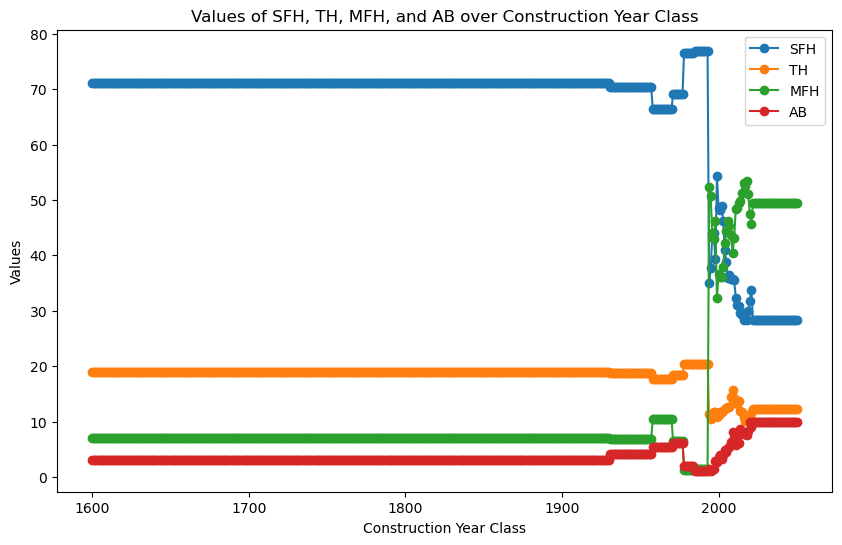

In [15]:
plt.figure(figsize=(10, 6))

# Tracer les valeurs des colonnes SFH, TH, MFH et AB en fonction de la colonne construction year class
plt.plot(data_percentage.index, data_percentage['SFH (%)'], label='SFH', marker='o')
plt.plot(data_percentage.index, data_percentage['TH (%)'], label='TH', marker='o')
plt.plot(data_percentage.index, data_percentage['MFH (%)'], label='MFH', marker='o')
plt.plot(data_percentage.index, data_percentage['AB (%)'], label='AB', marker='o')

# Ajouter des labels et un titre
plt.xlabel('Construction Year Class')
plt.ylabel('Values')
plt.title('Values of SFH, TH, MFH, and AB over Construction Year Class')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

In [16]:
#output_path = "C:\\leo\\double-diplome\\COURSES\\S2\\TEP4290\\project\\Project-TEP4290\\data\\02.Processed_baseline\\buildings\\type_split\\data_percentage.xlsx"
output_path = personnal_path + 'Project-TEP4290\\data\\02.Processed_baseline\\buildings\\type_split\\data_percentage.xlsx'
# Exporter le DataFrame en fichier Excel
data_percentage.to_excel(output_path, index=True)


### UFApD

From tabula data, we construct a dataframe with the area of buildings per year.

In [39]:
years = pd.Series(range(1600, 2051, 1))
data_area = pd.DataFrame(columns=['SFH','TH', 'MFH', 'AB'], index = years)
data_area.index.name = 'Year'
''' Material intensities data are for building type and not dwelling type. So we collect building area from TABULA
 '''
# unit is m²
for year in range(1600, 1915, 1):
    data_area.loc[year, 'SFH'] = 88
    data_area.loc[year, 'TH'] = 144
    data_area.loc[year, 'MFH'] = 213
    data_area.loc[year, 'AB'] = 1713

for year in range(1915, 1949, 1):
    data_area.loc[year, 'SFH'] = 86
    data_area.loc[year, 'TH'] = 96
    data_area.loc[year, 'MFH'] = 394
    data_area.loc[year, 'AB'] = 754

for year in range(1949, 1968, 1):
    data_area.loc[year, 'SFH'] = 79
    data_area.loc[year, 'TH'] = 87
    data_area.loc[year, 'MFH'] = 397
    data_area.loc[year, 'AB'] = 1981

for year in range(1968, 1975, 1):
    data_area.loc[year, 'SFH'] = 94
    data_area.loc[year, 'TH'] = 116
    data_area.loc[year, 'MFH'] = 460
    data_area.loc[year, 'AB'] = 4297

for year in range(1975, 1982, 1):
    data_area.loc[year, 'SFH'] = 130
    data_area.loc[year, 'TH'] = 83
    data_area.loc[year, 'MFH'] = 179
    data_area.loc[year, 'AB'] = 1227

for year in range(1982, 1990, 1):
    data_area.loc[year, 'SFH'] = 144
    data_area.loc[year, 'TH'] = 89
    data_area.loc[year, 'MFH'] = 851
    data_area.loc[year, 'AB'] = 3348

for year in range(1990, 2000, 1):
    data_area.loc[year, 'SFH'] = 107
    data_area.loc[year, 'TH'] = 171
    data_area.loc[year, 'MFH'] = 682
    data_area.loc[year, 'AB'] = 4890

for year in range(2000, 2006, 1):
    data_area.loc[year, 'SFH'] = 122
    data_area.loc[year, 'TH'] = 69
    data_area.loc[year, 'MFH'] = 497
    data_area.loc[year, 'AB'] = 2344

for year in range(2006, 2013, 1):
    data_area.loc[year, 'SFH'] = 105
    data_area.loc[year, 'TH'] = 74
    data_area.loc[year, 'MFH'] = 594
    data_area.loc[year, 'AB'] = 4660

for year in range(2013, 2051, 1):
    data_area.loc[year, 'SFH'] = 103
    data_area.loc[year, 'TH'] = 93
    data_area.loc[year, 'MFH'] = 539
    data_area.loc[year, 'AB'] = 2210
display(data_area)


,SFH,TH,MFH,AB
Year,,,,
1600,88,144,213,1713
1601,88,144,213,1713
1602,88,144,213,1713
1603,88,144,213,1713
1604,88,144,213,1713
...,...,...,...,...
2046,103,93,539,2210
2047,103,93,539,2210
2048,103,93,539,2210


We now calculate the number of dwelling in multi-dwellings buildings

In [40]:
years = pd.Series(range(1600, 2051, 1))
nb_dwellings = pd.DataFrame(columns=['SFH', 'TH', 'MFH', 'AB'], index=years)
nb_dwellings.index.name = 'Year'

'''To find the number of dwellings in the building, we assume that the number of dwellings is the ceiling of total area divided by the mean dwelling area of this period 
since area of dwelling in AB and MFH are often smaller than in TH and SFH 
'''
# unit is m²
for year in range(1600, 1915, 1):
    nb_dwellings.loc[year, 'SFH'] = 1
    nb_dwellings.loc[year, 'TH'] = 1
    nb_dwellings.loc[year, 'MFH'] = 213 // 81.5 + 1
    nb_dwellings.loc[year, 'AB'] = 1713 // 81.5 +1

for year in range(1915, 1949, 1):
    nb_dwellings.loc[year, 'SFH'] = 1
    nb_dwellings.loc[year, 'TH'] = 1
    nb_dwellings.loc[year, 'MFH'] = 394 // 81.5 +1
    nb_dwellings.loc[year, 'AB'] = 754 // 81.5 + 1

for year in range(1949, 1968, 1):
    nb_dwellings.loc[year, 'SFH'] = 1
    nb_dwellings.loc[year, 'TH'] = 1
    nb_dwellings.loc[year, 'MFH'] = 397 // 76 + 1
    nb_dwellings.loc[year, 'AB'] = 1981 // 76 + 1

for year in range(1968, 1975, 1):
    nb_dwellings.loc[year, 'SFH'] = 1
    nb_dwellings.loc[year, 'TH'] = 1
    nb_dwellings.loc[year, 'MFH'] = 460 // 76 + 1
    nb_dwellings.loc[year, 'AB'] = 4297 // 76 + 1

for year in range(1975, 1982, 1):
    nb_dwellings.loc[year, 'SFH'] = 1
    nb_dwellings.loc[year, 'TH'] = 1
    nb_dwellings.loc[year, 'MFH'] = 179 // 84 + 1
    nb_dwellings.loc[year, 'AB'] = 1227 //84 + 1

for year in range(1982, 1990, 1):
    nb_dwellings.loc[year, 'SFH'] = 1
    nb_dwellings.loc[year, 'TH'] = 1
    nb_dwellings.loc[year, 'MFH'] = 851 // 84 + 1
    nb_dwellings.loc[year, 'AB'] = 3348 // 84 + 1

for year in range(1990, 2000, 1):
    nb_dwellings.loc[year, 'SFH'] = 1
    nb_dwellings.loc[year, 'TH'] = 1
    nb_dwellings.loc[year, 'MFH'] = 682 // 84 + 1
    nb_dwellings.loc[year, 'AB'] = 4890 // 84 + 1

for year in range(2000, 2006, 1):
    nb_dwellings.loc[year, 'SFH'] = 1
    nb_dwellings.loc[year, 'TH'] = 1
    nb_dwellings.loc[year, 'MFH'] = 497 // 87.3 + 1
    nb_dwellings.loc[year, 'AB'] = 2344 // 87.3 + 1

for year in range(2006, 2013, 1):
    nb_dwellings.loc[year, 'SFH'] = 1
    nb_dwellings.loc[year, 'TH'] = 1
    nb_dwellings.loc[year, 'MFH'] = 594 // 87.3 + 1
    nb_dwellings.loc[year, 'AB'] = 4660 // 87.3 + 1

for year in range(2013, 2051, 1):
    nb_dwellings.loc[year, 'SFH'] = 1
    nb_dwellings.loc[year, 'TH'] = 1
    nb_dwellings.loc[year, 'MFH'] = 539 // 87.3 + 1
    nb_dwellings.loc[year, 'AB'] = 2210 // 87.3 + 1

display(nb_dwellings)
nb_dwellings.to_excel(personnal_path + 'Project-TEP4290\\data\\02.Processed_baseline\\buildings\\ufapd\\nb_dwellings_in_AB_MFH.xlsx', index=True)

,SFH,TH,MFH,AB
Year,,,,
1600,1,1,3.0,22.0
1601,1,1,3.0,22.0
1602,1,1,3.0,22.0
1603,1,1,3.0,22.0
1604,1,1,3.0,22.0
...,...,...,...,...
2046,1,1,7.0,26.0
2047,1,1,7.0,26.0
2048,1,1,7.0,26.0


In [41]:
data_ufapd = data_area / nb_dwellings
data_ufapd.to_excel(personnal_path + 'Project-TEP4290\\data\\02.Processed_baseline\\buildings\\ufapd\\data_ufapd.xlsx', index=True)

We print the data:

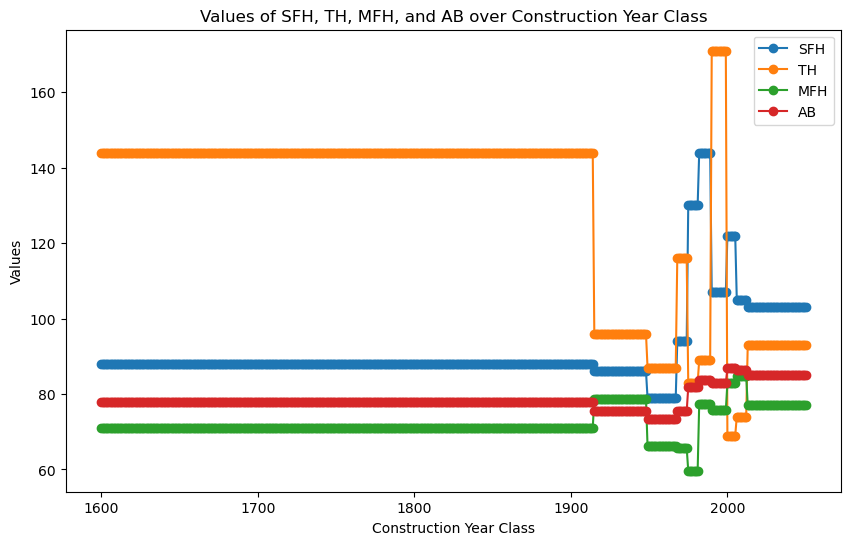

In [43]:
plt.figure(figsize=(10, 6))

# Tracer les valeurs des colonnes SFH, TH, MFH et AB en fonction de la colonne construction year class
plt.plot(data_ufapd.index, data_ufapd['SFH'], label='SFH', marker='o')
plt.plot(data_ufapd.index, data_ufapd['TH'], label='TH', marker='o')
plt.plot(data_ufapd.index, data_ufapd['MFH'], label='MFH', marker='o')
plt.plot(data_ufapd.index, data_ufapd['AB'], label='AB', marker='o')

# Ajouter des labels et un titre
plt.xlabel('Construction Year Class')
plt.ylabel('Values')
plt.title('Values of SFH, TH, MFH, and AB over Construction Year Class')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

### Population

We import the data:

In [19]:
# Extracting data from the source file into a panda Dataframe
#file_hist = "C:\\leo\\double-diplome\\COURSES\\S2\\TEP4290\\project\\Project-TEP4290\\data\\raw\\population\\population\\population_historique_1800_2024.xlsx"
file_hist = personnal_path + 'Project-TEP4290\\data\\01.Raw\\population\\population\\population_historique_1800_2024.xlsx'
#file_futur = "C:\\leo\\double-diplome\\COURSES\\S2\\TEP4290\\project\\Project-TEP4290\\data\\raw\\population\\population\\population_projection_2020_2070.xlsx"
file_futur = personnal_path + 'Project-TEP4290\\data\\01.Raw\\population\\population\\population_projection_2020_2070.xlsx'

headers_futur = pd.read_excel(file_futur, sheet_name=0, header=None, skiprows=3, nrows=1, usecols="C:K").iloc[0]
years=pd.concat([pd.read_excel(file_hist, sheet_name=0, header=None, skiprows=1, nrows=144, usecols="A").squeeze(), pd.read_excel(file_futur, sheet_name=0, header=None, skiprows=15, nrows=25, usecols="A").squeeze()]) 
data_hist = pd.read_excel(file_hist, sheet_name=0, header=None, skiprows=1, nrows=140, usecols="B").squeeze()
data_futur = pd.read_excel(file_futur, sheet_name=0, header=None, skiprows=10, nrows=29, usecols="C:K")

data_hist*=1000
data_futur*=1000000
data_pop = pd.DataFrame(columns=["Year"] + headers_futur.tolist())
data_pop["Year"] = years

for col in headers_futur:
    data_pop.loc[data_pop["Year"] <= 2020, col] = data_hist.values


data_pop.loc[data_pop["Year"] > 2020, headers_futur.tolist()] = data_futur.values

data_pop


,Year,Central,Fécondité basse,Fécondité haute,Espérance de vie basse,Espérance de vie haute,Solde migratoire bas,Solde migratoire haut,Population basse,Population haute
0,1801,29361000,29361000,29361000,29361000,29361000,29361000,29361000,29361000,29361000
1,1806,29648000,29648000,29648000,29648000,29648000,29648000,29648000,29648000,29648000
2,1811,30271000,30271000,30271000,30271000,30271000,30271000,30271000,30271000,30271000
3,1816,30573000,30573000,30573000,30573000,30573000,30573000,30573000,30573000,30573000
4,1821,31578000,31578000,31578000,31578000,31578000,31578000,31578000,31578000,31578000
...,...,...,...,...,...,...,...,...,...,...
20,2046,69300000.0,67800000.0,70700000.0,68200000.0,70400000.0,67600000.0,71000000.0,65100000.0,73700000.0
21,2047,69300000.0,67700000.0,70800000.0,68100000.0,70500000.0,67500000.0,71100000.0,64900000.0,73900000.0
22,2048,69300000.0,67600000.0,70900000.0,68100000.0,70500000.0,67400000.0,71100000.0,64700000.0,74100000.0
23,2049,69300000.0,67500000.0,71000000.0,68000000.0,70600000.0,67300000.0,71200000.0,64400000.0,74300000.0


We print the data:

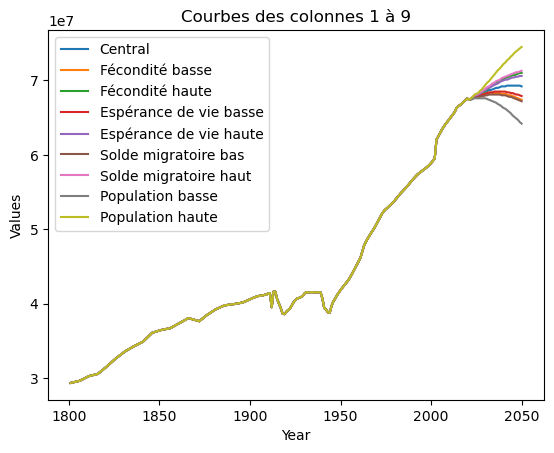

In [20]:
x = data_pop.iloc[:, 0]

# Tracer les courbes pour les colonnes 1 à 9
for col in data_pop.columns[1:]:
    plt.plot(x, data_pop[col], label=col)

# Ajouter les légendes et les labels
plt.xlabel(data_pop.columns[0])
plt.ylabel('Values')
plt.title('Courbes des colonnes 1 à 9')
plt.legend()

# Afficher le graphique
plt.show()

### PpD

We import the data:

In [21]:
# Extracting data from the source file into a panda Dataframe
#file = "C:\\leo\\double-diplome\\COURSES\\S2\\TEP4290\\project\\Project-TEP4290\\data\\raw\\population\\ppd\\PpD.xlsx"
file = personnal_path + 'Project-TEP4290\\data\\01.Raw\\population\\ppd\\PpD.xlsx'

# We read the data and store it in a Dataframe called "data", using the read_excel() panda function
headers = pd.read_excel(file, sheet_name=1, header=None, skiprows=0, nrows=1, usecols="A:B").iloc[0]
data_PpD = pd.read_excel(file, sheet_name=1,  header=None, skiprows=1,nrows=11, usecols="A:B")

data_PpD.columns = headers

# This is just to replace all the void values in "data" by 0, which makes things easier
data_PpD.fillna(0, inplace=True)
data_PpD

,Year,PpD
0,1962,3.10
1,1968,3.06
2,1975,2.89
3,1982,2.71
4,1990,2.58
5,1999,2.40
6,2008,2.30
7,2013,2.24
8,2018,2.19
9,2019,2.18


We print the data:

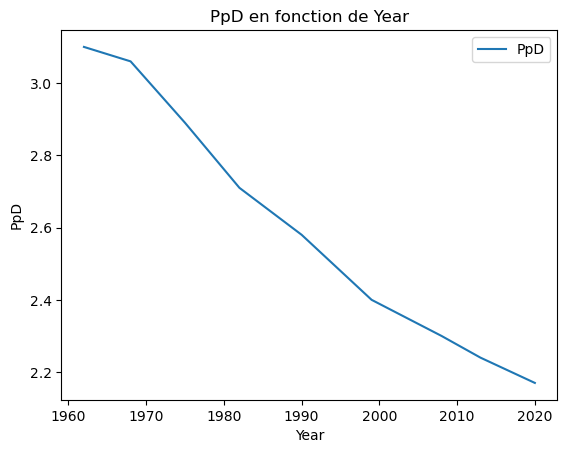

In [22]:
plt.plot(data_PpD['Year'], data_PpD['PpD'], label='PpD')

# Ajouter les légendes et les labels
plt.xlabel('Year')
plt.ylabel('PpD')
plt.title('PpD en fonction de Year')
plt.legend()

# Afficher le graphique
plt.show()

## Regression from 1600 to 2050 for the different data sets

The aim is now to obtain the stock, the inputs and the outputs for every year from 1600 to 2050.

For this period, we will use the following method to obtain the stock/input/output.  
1) We will compute a regression on the population, the people per dwelling and on the percentage of repartition of the types of dwelling.  
2) Then, we will obtain the stock thanks to these values with the relation: $stock= \frac{population}{ppd}$
3) Finally, we will use a stock-driven model in order to obtain the input, output and stock change


First, let's create a dataframe to stock our regressions:

In [23]:
years = list(range(1600,2051))
years=np.array(years)
# Créer un DataFrame avec une colonne 'construction year class'
years_pd = pd.DataFrame(years, columns=['construction year class'])

### Population

We will now focus on the population, and we will calculate the regression from 1600 to 2050.

In [24]:
#Dataset
label_courbes=['Polynomial degree 1', 'Polynomial degree 2', 'Polynomial degree 3', 'Logistic', 'Natural cubic spline']

#We add a new row to have a limit condition in 1600 and we assume that the population is 0
new_row = {'Year': 1600, 'Central': 0, 'Fécondité basse': 0, 'Fécondité haute': 0, 'Espérance de vie basse': 0, 'Espérance de vie haute': 0, 'Solde migratoire bas': 0, 'Solde migratoire haut': 0, 'Population basse': 0, 'Population haute': 0}
new_row_df = pd.DataFrame([new_row])
data_pop_new = pd.concat([new_row_df,data_pop], ignore_index=True)

#we create a new list to stock the future regression values
regression_finale_pop=[years,[],[],[],[],[]]


#### Polynomial regression

In [25]:
columns_to_process=[1,2,3,4,5,6,7,8,9]
for col in columns_to_process:
    reg_years = data_pop_new.iloc[0:data_pop_new.shape[0], 0].to_numpy(dtype=np.float64)
    reg_values = data_pop_new.iloc[0:data_pop_new.shape[0], col].to_numpy(dtype=np.float64)
    poly_inp,poly_out=polynomial_deg123_reg(reg_years, reg_values, years)
    regression_finale_pop[1].append(poly_out[0])
    regression_finale_pop[2].append(poly_out[1])
    regression_finale_pop[3].append(poly_out[2])


 the polynomial our fit created is: 
 
1.844e+05 x - 3.105e+08.
 the polynomial our fit created is: 
       2
310.6 x - 1.004e+06 x + 8.253e+08.
 the polynomial our fit created is: 
       3             2
2.039 x - 1.104e+04 x + 2e+07 x - 1.208e+10.
 the polynomial our fit created is: 
 
1.818e+05 x - 3.055e+08.
 the polynomial our fit created is: 
       2
293.8 x - 9.428e+05 x + 7.689e+08.
 the polynomial our fit created is: 
       3             2
1.886 x - 1.021e+04 x + 1.849e+07 x - 1.117e+10.
 the polynomial our fit created is: 
 
1.869e+05 x - 3.152e+08.
 the polynomial our fit created is: 
       2
326.7 x - 1.064e+06 x + 8.796e+08.
 the polynomial our fit created is: 
       3             2
2.186 x - 1.184e+04 x + 2.145e+07 x - 1.295e+10.
 the polynomial our fit created is: 
 
1.825e+05 x - 3.068e+08.
 the polynomial our fit created is: 
       2
298.1 x - 9.587e+05 x + 7.835e+08.
 the polynomial our fit created is: 
       3             2
1.927 x - 1.043e+04 x + 1.889e+07 x -

#### Logistic Regression

In [26]:
for col in columns_to_process:
    reg_years = data_pop_new.iloc[0:data_pop_new.shape[0], 0].to_numpy(dtype=np.float64)
    reg_values = data_pop_new.iloc[0:data_pop_new.shape[0], col].to_numpy(dtype=np.float64)
    poly_inp, poly_out=logistic_reg(reg_years, reg_values, years, 'black', 0, 0, 1000000000, 10, 80000000)
    regression_finale_pop[4].append(poly_out)
  

The optimal choice of parameters for the logistic function, given the sample data, is [1.90581364e+03 9.44858965e+01 9.99999306e+00 8.00000000e+07] (ti, tau, C0, C1).
The optimal choice of parameters for the logistic function, given the sample data, is [1.90558387e+03 9.59674729e+01 9.99999955e+00 8.00000000e+07] (ti, tau, C0, C1).
The optimal choice of parameters for the logistic function, given the sample data, is [1.90603078e+03 9.31034694e+01 9.99998970e+00 8.00000000e+07] (ti, tau, C0, C1).
The optimal choice of parameters for the logistic function, given the sample data, is [1.90564485e+03 9.55889922e+01 9.99999239e+00 8.00000000e+07] (ti, tau, C0, C1).
The optimal choice of parameters for the logistic function, given the sample data, is [1.90598955e+03 9.33383677e+01 9.99998240e+00 8.00000000e+07] (ti, tau, C0, C1).
The optimal choice of parameters for the logistic function, given the sample data, is [1.90553598e+03 9.63337647e+01 9.99999171e+00 8.00000000e+07] (ti, tau, C0, C1)

#### Cubic regression

In [27]:
for col in columns_to_process:
    reg_years = data_pop_new.iloc[0:data_pop_new.shape[0], 0].to_numpy(dtype=np.float64)
    reg_values = data_pop_new.iloc[0:data_pop_new.shape[0], col].to_numpy(dtype=np.float64)
    poly_inp, poly_out=natural_cubic_line_reg(reg_years, reg_values, years, 'black')
    regression_finale_pop[5].append(poly_out)


The ncs_model
The ncs_model
The ncs_model
The ncs_model
The ncs_model
The ncs_model
The ncs_model
The ncs_model
The ncs_model


#### Comparison of the regressions

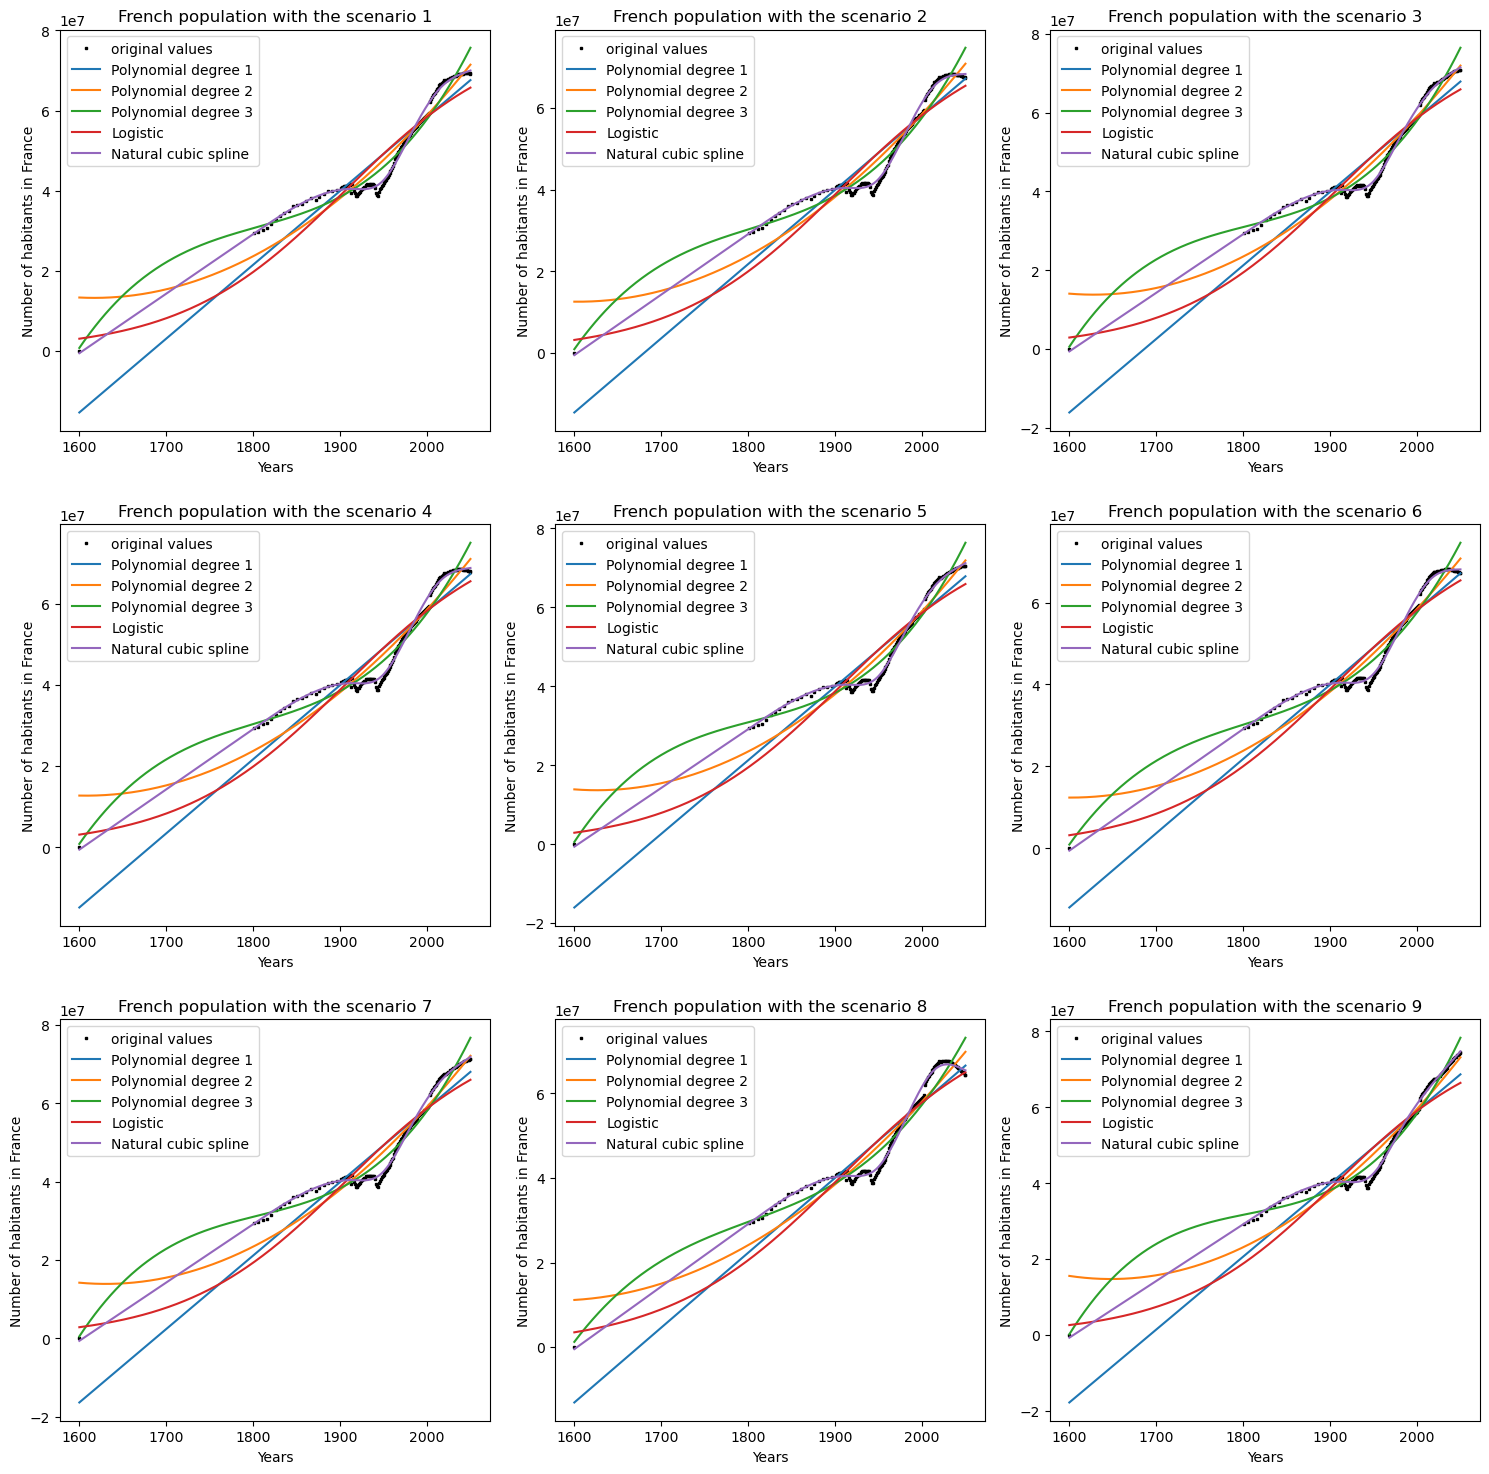

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
# Itérer sur les colonnes et les axes pour tracer les graphiques
for col, ax in enumerate(axes.flatten()):
    ax.plot(reg_years, data_pop_new.iloc[:, col+1], 's', color='black', markersize=2, label='original values')
    for i in range(1, 6):
        x_values = regression_finale_pop[0]
        y_values = regression_finale_pop[i][col]
        ax.plot(x_values, y_values, label=label_courbes[i-1])
    ax.set_xlabel('Years')
    ax.set_ylabel(f'Number of habitants in France')
    ax.set_title(f'French population with the scenario {col+1}')
    ax.legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

We will use the natural cubic spline for our regression method.

### PpD

#### Preparation of the Data

In [29]:
label_courbes=['Polynomial degree 1', 'Polynomial degree 2', 'Polynomial degree 3', 'Logistic', 'Natural cubic spline']
# Supprimez les lignes avec des valeurs manquantes
data_PpD = data_PpD.dropna(subset=[data_PpD.columns[0], data_PpD.columns[1]])
new_row = {'Year': 1600, 'PpD': 4}
new_row_df = pd.DataFrame([new_row])
data_PpD_new = pd.concat([new_row_df,data_PpD], ignore_index=True)

#ajout de n lignes pour la regression encessitant 10 valeurs
n=2
for i in range(n):
    new_row_bis = {'Year': round((data_PpD_new.iloc[0,0]+data_PpD_new.iloc[1,0])/2), 'PpD': (data_PpD_new.iloc[0,1]+data_PpD_new.iloc[1,1])/2}
    new_row_bis_df = pd.DataFrame([new_row_bis])
    data_PpD_new = pd.concat([data_PpD_new.iloc[:1], new_row_bis_df, data_PpD_new.iloc[1:]], ignore_index=True)


# Transformer les colonnes spécifiques en tableaux numpy

regression_finale_PpD=[years,[],[],[],[],[]]

#### Polynomial Regression

In [34]:
columns_to_process=[1]
for col in columns_to_process:
    reg_years = data_PpD_new.iloc[0:data_PpD_new.shape[0], 0].to_numpy(dtype=np.float64)
    reg_values = data_PpD_new.iloc[0:data_PpD_new.shape[0], col].to_numpy(dtype=np.float64)
    poly_inp,poly_out=polynomial_deg123_reg(reg_years, reg_values, years)
    regression_finale_PpD[1].append(poly_out[0])
    regression_finale_PpD[2].append(poly_out[1])
    regression_finale_PpD[3].append(poly_out[2])


 the polynomial our fit created is: 
 
-0.004211 x + 10.92.
 the polynomial our fit created is: 
            2
-1.429e-05 x + 0.04804 x - 36.44.
 the polynomial our fit created is: 
            3             2
-1.043e-07 x + 0.0005524 x - 0.9749 x + 576.8.


#### Logistic regression

In [35]:
columns_to_process=[1]
for col in columns_to_process:
    reg_years = data_PpD_new.iloc[0:data_PpD_new.shape[0], 0].to_numpy(dtype=np.float64)
    reg_values = data_PpD_new.iloc[0:data_PpD_new.shape[0], col].to_numpy(dtype=np.float64)
    poly_inp, poly_out=logistic_reg(reg_years, reg_values, years, 'black', 0, 0, 1000000, 1000000, 1000000)
    regression_finale_PpD[4].append(poly_out)


The optimal choice of parameters for the logistic function, given the sample data, is [1.97517660e+03 2.17326117e+01 3.77470313e+00 1.96673326e+00] (ti, tau, C0, C1).


#### Cubic Regression

In [36]:
columns_to_process=[1]
for col in columns_to_process:
    reg_years = data_PpD_new.iloc[0:data_PpD_new.shape[0], 0].to_numpy(dtype=np.float64)
    reg_values = data_PpD_new.iloc[0:data_PpD_new.shape[0], col].to_numpy(dtype=np.float64)
    print(reg_years)
    print(reg_values)
    poly_inp, poly_out=natural_cubic_line_reg(reg_years, reg_values, years, 'black')
    regression_finale_PpD[5].append(poly_out)


[1600. 1690. 1781. 1962. 1968. 1975. 1982. 1990. 1999. 2008. 2013. 2018.
 2019. 2020.]
[4.    3.775 3.55  3.1   3.06  2.89  2.71  2.58  2.4   2.3   2.24  2.19
 2.18  2.17 ]
The ncs_model


c:\Users\Clothilde\Documents\GitHub\Project-TEP4290\tep4290_group_02\01.Raw_processing\regression_functions.py:204: RankWarning: Polyfit may be poorly conditioned
  polynomial = np.poly1d(np.polyfit(x, y, 3))
c:\Users\Clothilde\Documents\GitHub\Project-TEP4290\tep4290_group_02\01.Raw_processing\regression_functions.py:204: RankWarning: Polyfit may be poorly conditioned
  polynomial = np.poly1d(np.polyfit(x, y, 3))
c:\Users\Clothilde\Documents\GitHub\Project-TEP4290\tep4290_group_02\01.Raw_processing\regression_functions.py:204: RankWarning: Polyfit may be poorly conditioned
  polynomial = np.poly1d(np.polyfit(x, y, 3))
c:\Users\Clothilde\Documents\GitHub\Project-TEP4290\tep4290_group_02\01.Raw_processing\regression_functions.py:204: RankWarning: Polyfit may be poorly conditioned
  polynomial = np.poly1d(np.polyfit(x, y, 3))
c:\Users\Clothilde\Documents\GitHub\Project-TEP4290\tep4290_group_02\01.Raw_processing\regression_functions.py:204: RankWarning: Polyfit may be poorly conditioned
 

#### Comparison of the regressions 

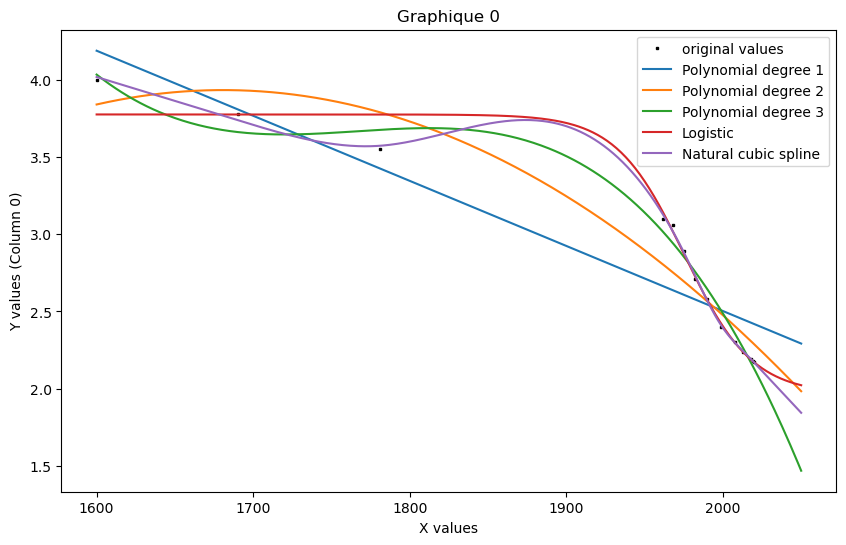

In [38]:
for col in range(1):
    plt.figure(figsize=(10, 6))
    plt.plot(reg_years, data_PpD_new.iloc[:,col+1], 's', color = 'black', markersize = 2, label = f'original values')
    for i in range(1,6):
        x_values = regression_finale_PpD[0]
        y_values = regression_finale_PpD[i][col]
        plt.plot(x_values, y_values, label=label_courbes[i-1])
    plt.xlabel('X values')
    plt.ylabel(f'Y values (Column {col})')
    plt.title(f'Graphique {col}')
    plt.legend()
    plt.show()

We finally choose the regression natural cubic spline

## Baseline scenario

We have now data sets from 1600 to 2050 for the population, the people per dwelling and the repartition of the different types of dwelling.
We will now stock these data sets in a DataFrame and calculate our baseline scenario to help us for our scenarios.
 

### Stock-driven model from 1600 to 2050

In [44]:
# create a new dataframe to stock the final data
data_final= pd.DataFrame(columns=['Year', 'Population', 'Inflow', 'Outflow', 'Stock Change', 'Stock', 'PpD'])
data_final['Year']=years
data_final['Population']=regression_finale_pop[-1][0] #we choose the cubic spline regression (with the [-1]) and the central scenario (with the [0])
data_final['PpD']=regression_finale_PpD[-1][0] #we choose the cubic spline regression (with the [-1])
# replace negative value in population and people per dwelling by 0
data_final.loc[data_final['Population'] < 0, 'Population'] = 0
data_final['Stock']=data_final['Population']/data_final['PpD']
data_final.fillna(0, inplace=True)
display(data_final)


C:\Users\Clothilde\AppData\Local\Temp\ipykernel_18532\3129730137.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_final.fillna(0, inplace=True)


,Year,Population,Inflow,Outflow,Stock Change,Stock,PpD
0,1600,0.000000e+00,0,0,0,0.000000e+00,4.017039
1,1601,0.000000e+00,0,0,0,0.000000e+00,4.013938
2,1602,0.000000e+00,0,0,0,0.000000e+00,4.010837
3,1603,0.000000e+00,0,0,0,0.000000e+00,4.007736
4,1604,3.135472e+03,0,0,0,7.829607e+02,4.004635
...,...,...,...,...,...,...,...
446,2046,6.967725e+07,0,0,0,3.691195e+07,1.887661
447,2047,6.975382e+07,0,0,0,3.716569e+07,1.876834
448,2048,6.982985e+07,0,0,0,3.742208e+07,1.866006
449,2049,6.990560e+07,0,0,0,3.768132e+07,1.855179


We now compute the stock driven model method in order to find the inflows, the outflows and the stock change.

In [45]:
#calculation of the outflow/inflows/stock change
a = (40 - 80) / 20
b = (200- 80) / 20
Stock= data_final.loc[:,'Stock'].to_numpy()
TestDSMX = DynamicStockModel(t = np.arange(1600,2051,1), s = Stock, lt = {'Type': 'TruncNorm', 'a': np.array([a]), 'b': np.array([b]),  'Mean': np.array([80]), 'StdDev': np.array([20]) })
print(TestDSMX.dimension_check())

CheckStr, ExitFlag = TestDSMX.dimension_check()

S_C_sd, O_C_sd, I_sd, ExitFlag = TestDSMX.compute_stock_driven_model()
O_sd, ExitFlag   = TestDSMX.compute_outflow_total()
DS_sd, ExitFlag  = TestDSMX.compute_stock_change()
Bal_sd, ExitFlag = TestDSMX.check_stock_balance()
#print(TestDSMX.s_c)

#print(type(O_sd))
data_final.loc[:,'Outflow']=  O_sd[:]
data_final.loc[:,'Inflow']=  I_sd[:] 
data_final.loc[:,'Stock Change']=  DS_sd[:]
print(data_final.head())

stock_2011=data_final.loc[data_final['Year']==2011]['Stock']

('<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 451 years.<br>Inflow is not present.<br>Total stock is present with 451 years.<br>Stock by cohorts is not present.<br>Total outflow is not present.<br>Outflow by cohorts is not present.<br>Lifetime distribution is present with type TruncNorm and mean [80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80

C:\Users\Clothilde\AppData\Local\Temp\ipykernel_18532\329853508.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.27371290e+00 1.10459902e+02 2.29883720e+02
 3.61367310e+02 5.05751985e+02 6.63893562e+02 8.36657085e+02
 1.02491098e+03 1.

### Inflow-driven model for each dwelling types

In [46]:
data_typesplit_percentage = pd.read_excel(personnal_path + 'Project-TEP4290\\data\\02.Processed_baseline\\buildings\\type_split\\data_percentage.xlsx', header = 0, index_col = 0)
data_typesplit_percentage.reset_index(drop=True, inplace=True)

data_final['Inflow SFH'] = data_final['Inflow'] * data_typesplit_percentage['SFH (%)'] * 0.01
data_final['Inflow TH'] = data_final['Inflow']*data_typesplit_percentage['TH (%)']*0.01
data_final['Inflow MFH'] = data_final['Inflow']*data_typesplit_percentage['MFH (%)']*0.01
data_final['Inflow AB'] = data_final['Inflow']*data_typesplit_percentage['AB (%)']*0.01

#### AB values

In [48]:
TestDSMX_AB = DynamicStockModel(t = np.arange(1600,2051,1), i = data_final['Inflow AB'].to_numpy(), lt = {'Type': 'TruncNorm', 'a': np.array([a]), 'b': np.array([b]),  'Mean': np.array([80]), 'StdDev': np.array([20])  })
print(TestDSMX.dimension_check())

CheckStr, ExitFlag = TestDSMX.dimension_check()

S_c_id, ExitFlag = TestDSMX_AB.compute_s_c_inflow_driven()
S_id, ExitFlag = TestDSMX_AB.compute_stock_total()
O_c_id, ExitFlag = TestDSMX_AB.compute_o_c_from_s_c()
O_id, ExitFlag = TestDSMX_AB.compute_outflow_total()
SC_id, ExitFlag = TestDSMX_AB.compute_stock_change()

data_final['Stock AB'] = S_id[:]
data_final['Outflow AB']=  O_id[:]
data_final['Stock Change AB']=  SC_id[:]
outflow_b_c_AB=  O_c_id[:]
print(data_final.head())

('<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 451 years.<br>Inflow vector is present with 451 years.<br>Total stock is present with 451 years.<br>Stock by cohorts is present with 451 years and 451 cohorts.<br>Total outflow is present with 451 years.<br>Outflow by cohorts is present with 451 years and 451 cohorts.<br>Lifetime distribution is present with type TruncNorm and mean [80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80

#### TH values

In [49]:
TestDSMX_TH = DynamicStockModel(t = np.arange(1600,2051,1), i = data_final['Inflow TH'].to_numpy(), lt = {'Type': 'TruncNorm', 'a': np.array([a]), 'b': np.array([b]),  'Mean': np.array([2]), 'StdDev': np.array([80])  })
print(TestDSMX.dimension_check())

CheckStr, ExitFlag = TestDSMX.dimension_check()

S_c_id, ExitFlag = TestDSMX_TH.compute_s_c_inflow_driven()
S_id, ExitFlag = TestDSMX_TH.compute_stock_total()
O_c_id, ExitFlag = TestDSMX_TH.compute_o_c_from_s_c()
O_id, ExitFlag = TestDSMX_TH.compute_outflow_total()
SC_id, ExitFlag = TestDSMX_TH.compute_stock_change()

data_final['Stock TH'] = S_id[:]
data_final['Outflow TH']=  O_id[:]
data_final['Stock Change TH']=  SC_id[:]
outflow_b_c_TH=  O_c_id[:]
print(data_final.head())

('<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 451 years.<br>Inflow vector is present with 451 years.<br>Total stock is present with 451 years.<br>Stock by cohorts is present with 451 years and 451 cohorts.<br>Total outflow is present with 451 years.<br>Outflow by cohorts is present with 451 years and 451 cohorts.<br>Lifetime distribution is present with type TruncNorm and mean [80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80

#### MFH values

In [50]:
TestDSMX_MFH = DynamicStockModel(t = np.arange(1600,2051,1), i = data_final['Inflow MFH'].to_numpy(), lt = {'Type': 'TruncNorm', 'a': np.array([a]), 'b': np.array([b]),  'Mean': np.array([2]), 'StdDev': np.array([80])  })
print(TestDSMX.dimension_check())

CheckStr, ExitFlag = TestDSMX.dimension_check()

S_c_id, ExitFlag = TestDSMX_MFH.compute_s_c_inflow_driven()
S_id, ExitFlag = TestDSMX_MFH.compute_stock_total()
O_c_id, ExitFlag = TestDSMX_MFH.compute_o_c_from_s_c()
O_id, ExitFlag = TestDSMX_MFH.compute_outflow_total()
SC_id, ExitFlag = TestDSMX_MFH.compute_stock_change()

data_final['Stock MFH'] = S_id[:]
data_final['Outflow MFH']=  O_id[:]
data_final['Stock Change MFH']=  SC_id[:]
outflow_b_c_MFH=  O_c_id[:]
print(data_final.head())

('<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 451 years.<br>Inflow vector is present with 451 years.<br>Total stock is present with 451 years.<br>Stock by cohorts is present with 451 years and 451 cohorts.<br>Total outflow is present with 451 years.<br>Outflow by cohorts is present with 451 years and 451 cohorts.<br>Lifetime distribution is present with type TruncNorm and mean [80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80

#### SFH values

In [51]:
TestDSMX_SFH = DynamicStockModel(t = np.arange(1600,2051,1), i = data_final['Inflow SFH'].to_numpy(), lt = {'Type': 'TruncNorm', 'a': np.array([a]), 'b': np.array([b]),  'Mean': np.array([2]), 'StdDev': np.array([80])  })
print(TestDSMX.dimension_check())

CheckStr, ExitFlag = TestDSMX.dimension_check()

S_c_id, ExitFlag = TestDSMX_SFH.compute_s_c_inflow_driven()
S_id, ExitFlag = TestDSMX_SFH.compute_stock_total()
O_c_id, ExitFlag = TestDSMX_SFH.compute_o_c_from_s_c()
O_id, ExitFlag = TestDSMX_SFH.compute_outflow_total()
SC_id, ExitFlag = TestDSMX_SFH.compute_stock_change()

data_final['Stock SFH'] = S_id[:]
data_final['Outflow SFH']=  O_id[:]
data_final['Stock Change SFH']=  SC_id[:]
outflow_b_c_SFH=  O_c_id[:]
print(data_final.head())

('<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 451 years.<br>Inflow vector is present with 451 years.<br>Total stock is present with 451 years.<br>Stock by cohorts is present with 451 years and 451 cohorts.<br>Total outflow is present with 451 years.<br>Outflow by cohorts is present with 451 years and 451 cohorts.<br>Lifetime distribution is present with type TruncNorm and mean [80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80\n 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80

### Data exports

In [54]:
#data_final.to_excel("C:\\leo\\double-diplome\\data_ts_construction_dw.xlsx", index=False)
data_final.to_excel(personnal_path + "Project-TEP4290\\data\\05.Results\\baseline\\data_ts_construction_dw.xlsx", index=False)
pd.DataFrame(outflow_b_c_SFH).to_excel(personnal_path + "Project-TEP4290\\data\\05.Results\\baseline\\outflow_b_c_SFH.xlsx", index=True)
pd.DataFrame(outflow_b_c_MFH).to_excel(personnal_path + "Project-TEP4290\\data\\05.Results\\baseline\\outflow_b_c_MFH.xlsx", index=True)
pd.DataFrame(outflow_b_c_TH).to_excel(personnal_path + "Project-TEP4290\\data\\05.Results\\baseline\\outflow_b_c_TH.xlsx", index=True)
pd.DataFrame(outflow_b_c_AB).to_excel(personnal_path + "Project-TEP4290\\data\\05.Results\\baseline\\outflow_b_c_AB.xlsx", index=True)